# Data Exploration Project - Phishing Dataset for Machine Learning

### Classifing Websites into Phishing and Non-Phishing.

## Imports

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split, GridSearchCV, cross_val_score
)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel


In [105]:
data = pd.read_csv("Phishing_Legitimate_full.csv") # read the csv-file
data.rename(columns={'CLASS_LABEL': 'target'}, inplace=True) # rename CLASS_LABEL into target

## View Dataset

In [108]:
data.info() # view every column and see if there are any values missing --> no values missing, only numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [107]:
data.sample(20) # small smaple to get a better idea of the data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,target
4195,4196,1,0,2,29,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,1
9177,9178,2,1,2,37,0,0,0,0,0,...,1,0,1,1,1,-1,0,0,1,0
6426,6427,1,0,4,67,4,0,0,0,0,...,1,0,0,1,0,-1,1,0,1,0
3462,3463,6,4,4,62,0,0,0,0,0,...,0,0,0,-1,0,1,1,0,-1,1
2093,2094,4,1,3,44,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
4259,4260,2,0,5,58,0,0,0,0,0,...,0,0,0,1,0,1,1,1,-1,1
9183,9184,3,1,2,54,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
6089,6090,3,1,1,99,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,1,0
8037,8038,1,0,2,83,7,0,0,0,0,...,0,0,0,1,-1,-1,1,0,1,0
3879,3880,3,1,2,35,0,0,0,0,0,...,0,0,0,1,1,-1,1,-1,0,1


In [114]:
data.describe() # looking for weird values our outliers --> HttpsInHostname mean is 0 --> every row is 0

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='target'>

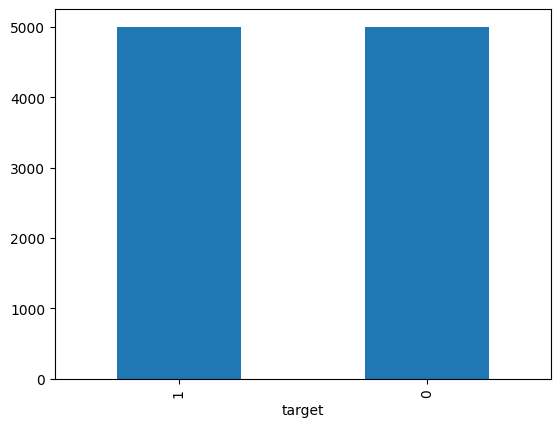

In [110]:
data['target'].value_counts().plot(kind='bar') # analyse the balance --> perfect

In [111]:
print(data.duplicated()) # lookinig for duplicates --> no duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


## Feature-Selections

### Spearman-Correlation

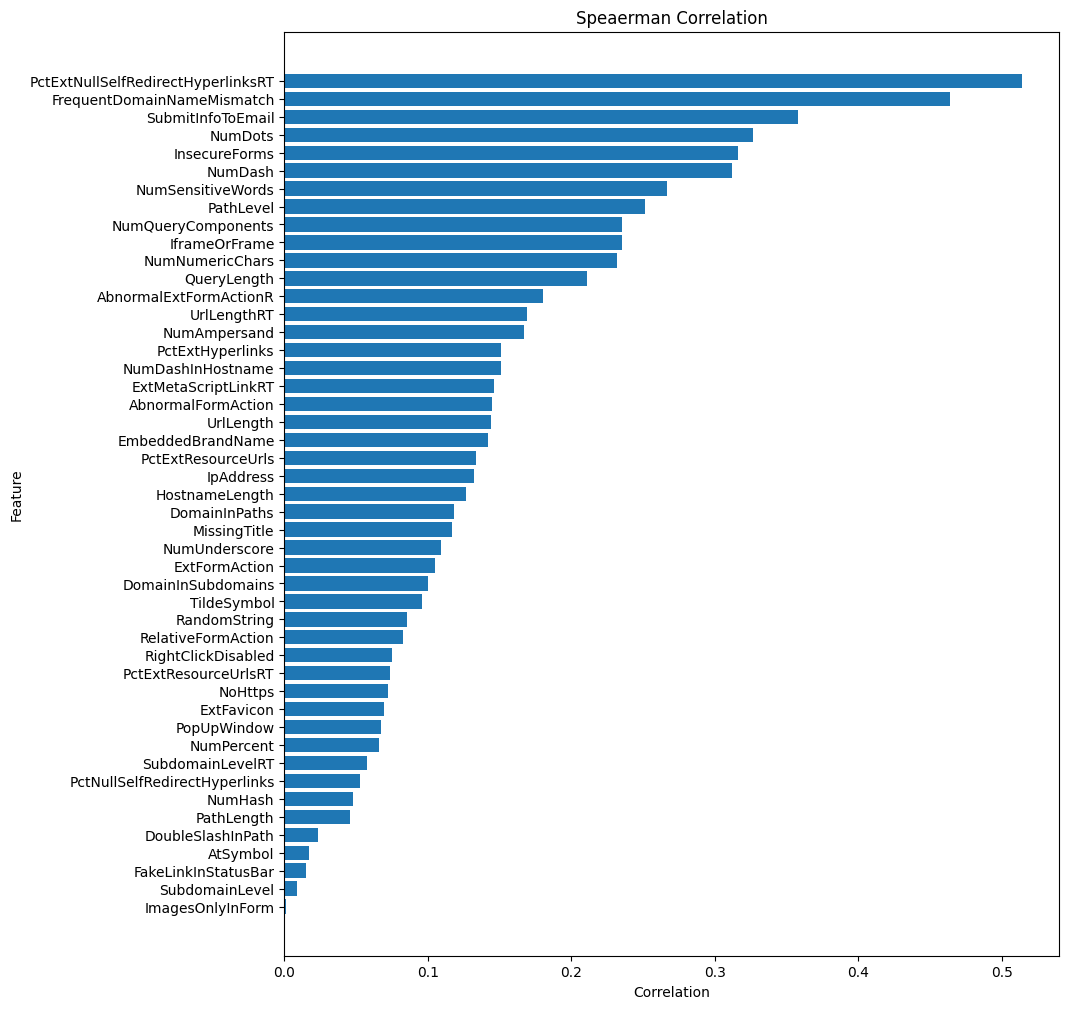

In [115]:
# sorting columns after correlation and plotting them
spearman_sel = data.drop(["id"], axis=1).corr(method='spearman')["target"].abs().sort_values(ascending=False)
spearman_sel = spearman_sel.drop("target").drop("HttpsInHostname")

spearman_sel_sorted = spearman_sel.sort_values(ascending=True)
plt.figure(figsize=(10, 12))
plt.barh(spearman_sel_sorted.index, spearman_sel_sorted.values)
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Speaerman Correlation')
plt.show()



### Random-Forest-Feature-Importance

PctExtHyperlinks                      0.191029
PctExtNullSelfRedirectHyperlinksRT    0.151778
FrequentDomainNameMismatch            0.104854
PctExtResourceUrls                    0.081344
PctNullSelfRedirectHyperlinks         0.059178
NumDash                               0.054568
NumNumericChars                       0.036015
ExtMetaScriptLinkRT                   0.034301
InsecureForms                         0.029790
SubmitInfoToEmail                     0.025015
PathLevel                             0.024753
NumDots                               0.021770
PathLength                            0.019942
NumSensitiveWords                     0.017704
UrlLength                             0.016172
QueryLength                           0.013851
HostnameLength                        0.013614
NumQueryComponents                    0.011404
IframeOrFrame                         0.010491
ExtFavicon                            0.009917
NumUnderscore                         0.006675
NumAmpersand 

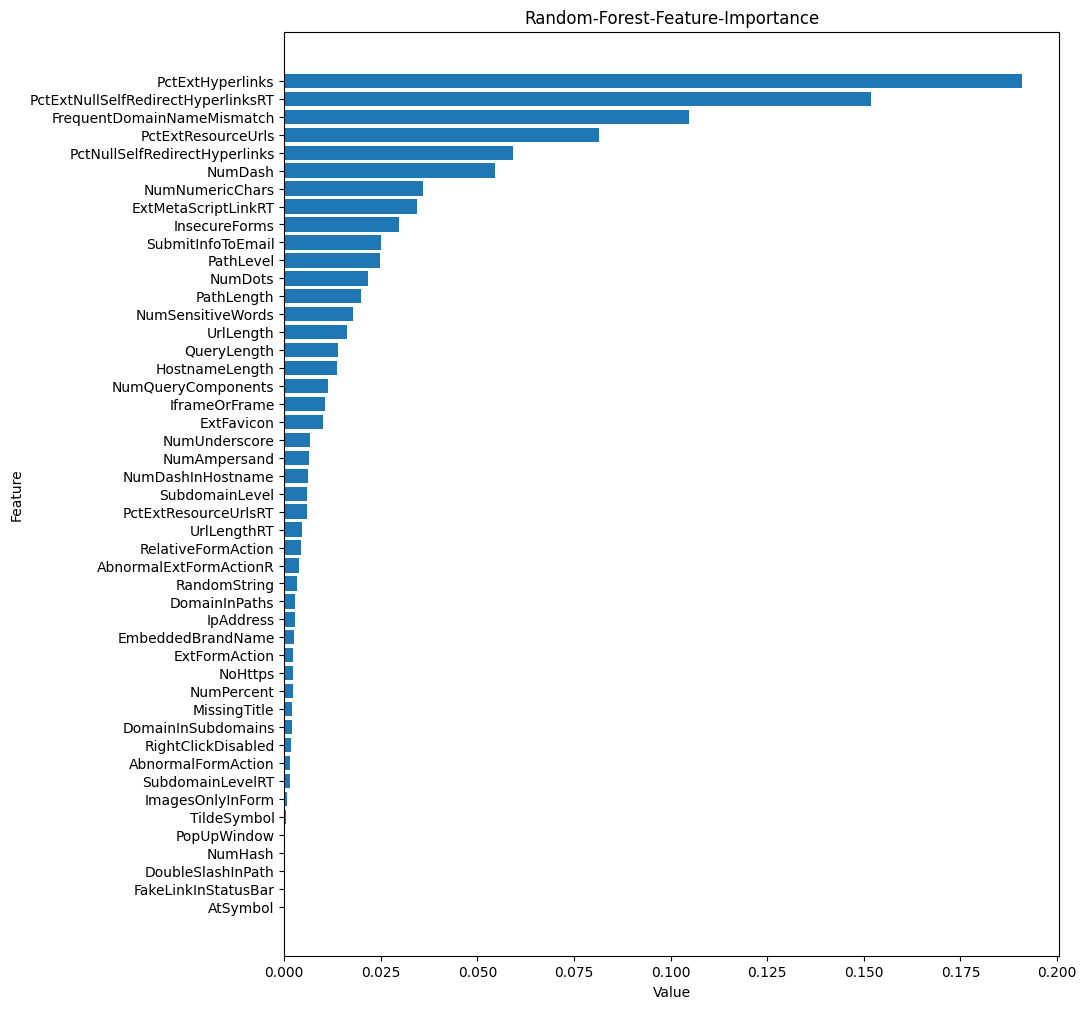

In [11]:
# sorting columns after importance and plotting them
X = data.drop("id", axis=1).drop("target", axis=1)
y = data["target"] 

rf_ftr_imp = RandomForestClassifier()
rf_ftr_imp.fit(X, y)

rf_ftr_imps = rf_ftr_imp.feature_importances_

rf_sel = pd.Series(rf_ftr_imps, index=X.columns).abs().sort_values(ascending=False).drop("HttpsInHostname")

print(rf_sel)

rf_sel = rf_sel.sort_values(ascending=True)
plt.figure(figsize=(10, 12))
plt.barh(rf_sel.index, rf_sel.values)
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Random-Forest-Feature-Importance')
plt.show()

## Try different classifiers

### Split

In [62]:
# Splitting Data 80/20
X = data.drop("id", axis=1).drop("target", axis=1)
y = data["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 48)
Shape of X_test: (2000, 48)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [13]:
def evaluate(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    
    print("Accuracy:    ", accuracy)
    print("F1-Score:    ", f1)
    print("Precision:   ", precision)
    print("Recall:      ", recall)
    print()
    print(classification_report(y_test, y_pred))
    print()

    disp.plot()

In [14]:
def evaluate_train(y_pred):
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)

    conf_mat = confusion_matrix(y_train, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
        
    print("Accuracy:    ", accuracy)
    print("F1-Score:    ", f1)
    print("Precision:   ", precision)
    print("Recall:      ", recall)

    disp.plot()

### Classifier

#### Dummy-Classifier

Accuracy:     0.5095
F1-Score:     0.5179361179361179
Precision:    0.5151515151515151
Recall:       0.5207509881422925

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       988
           1       0.52      0.52      0.52      1012

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000




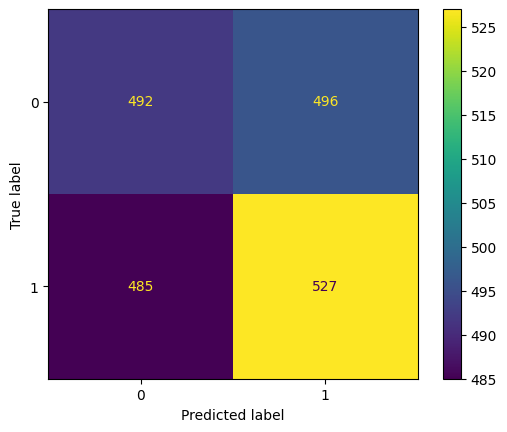

In [15]:
dummy_clf = DummyClassifier(strategy="uniform", random_state=4)
dummy_clf.fit(X_train, y_train)

y_pred_dummy = dummy_clf.predict(X_test)

evaluate(y_pred_dummy)

#### Decision-Tree

Accuracy:     0.972
F1-Score:     0.9724137931034482
Precision:    0.9695481335952849
Recall:       0.9752964426877471

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       988
           1       0.97      0.98      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000




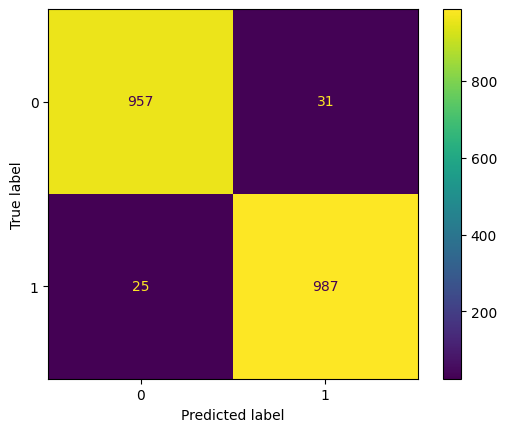

In [16]:
dt_clf = DecisionTreeClassifier(random_state=4)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

evaluate(y_pred_dt)

#### Random_Forest

Accuracy:     0.9835
F1-Score:     0.9837037037037037
Precision:    0.983218163869694
Recall:       0.9841897233201581

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000




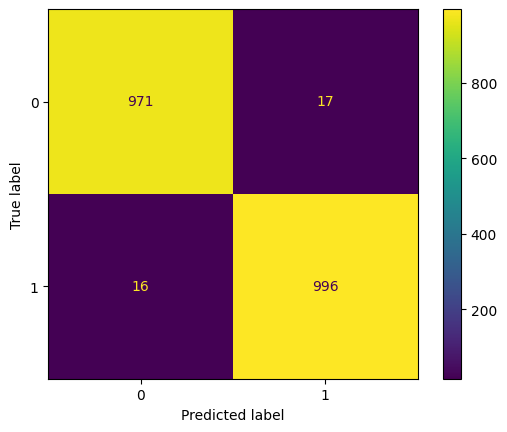

In [63]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

evaluate(y_pred_rf)

Accuracy:     1.0
F1-Score:     1.0
Precision:    1.0
Recall:       1.0


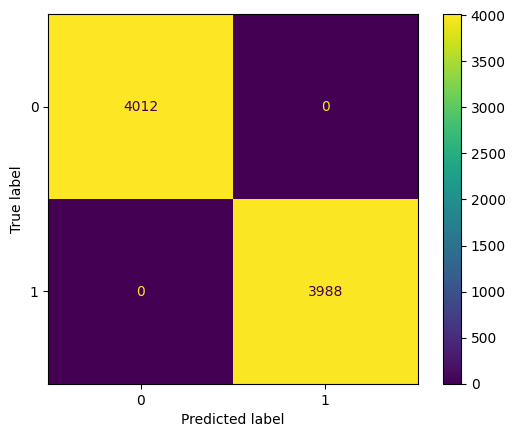

In [18]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred_rf_train = rf_clf.predict(X_train)

evaluate_train(y_pred_rf_train)

In [19]:
rf_clf = RandomForestClassifier()

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

print("Durchschnittlicher Score:", np.mean(cv_scores))

Durchschnittlicher Score: 0.9808749999999999


#### Logistic-Regression

Accuracy:     0.938
F1-Score:     0.9392752203721841
Precision:    0.9310679611650485
Recall:       0.9476284584980237

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       988
           1       0.93      0.95      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000




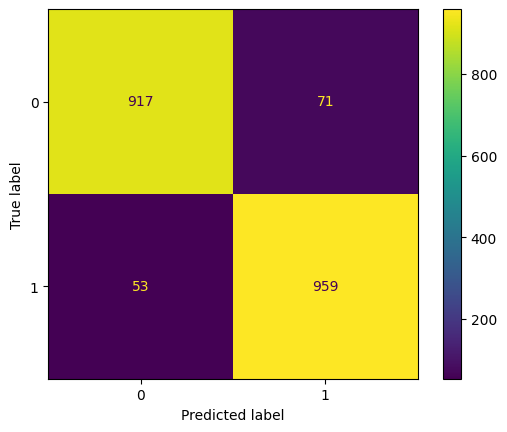

In [20]:
lg_reg = LogisticRegression(random_state=4, max_iter=10000)
lg_reg.fit(X_train, y_train)

y_pred_lg = lg_reg.predict(X_test)

evaluate(y_pred_lg)

#### Support-Vektor-Machine

Accuracy:     0.9405
F1-Score:     0.9416380578715057
Precision:    0.934761441090555
Recall:       0.9486166007905138

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       988
           1       0.93      0.95      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000




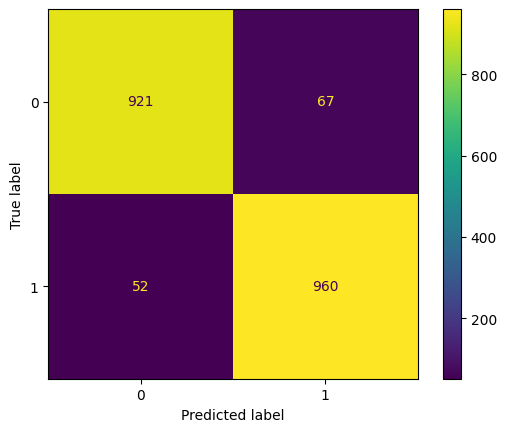

In [21]:
# linear
svm = SVC(kernel="linear", random_state=4)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

evaluate(y_pred_svm)

Accuracy:     0.774
F1-Score:     0.8122923588039868
Precision:    0.7005730659025788
Recall:       0.9664031620553359

              precision    recall  f1-score   support

           0       0.94      0.58      0.72       988
           1       0.70      0.97      0.81      1012

    accuracy                           0.77      2000
   macro avg       0.82      0.77      0.76      2000
weighted avg       0.82      0.77      0.76      2000




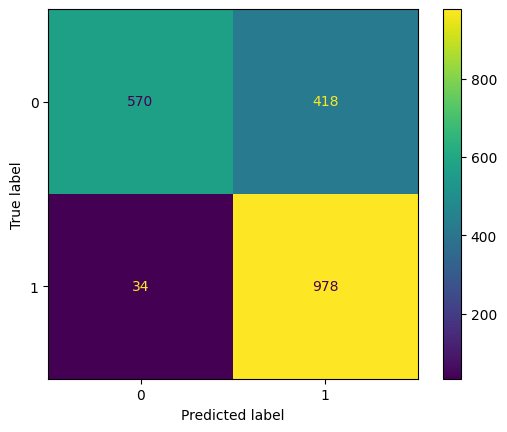

In [22]:
# poly
svm = SVC(kernel="poly", degree=3,random_state=4)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

evaluate(y_pred_svm)

## Tune Random-Forest 

### Hyperparametertuning für Random-Forest

In [64]:

search_space = {
    'n_estimators': [105],
    'max_depth': [None, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 100, 200],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf_hyper_clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_hyper_clf, param_grid=search_space, scoring="f1", cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.7s
[CV] END max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=8

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 85, 86, 87, 88, 89, 90, 91, 92, 93,
                                       94, 95, 100, 200],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [105]},
             scoring='f1', verbose=2)

In [66]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 86, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 105}
0.9821787058204052


Accuracy:     0.9845
F1-Score:     0.9846913580246913
Precision:    0.9842053307008884
Recall:       0.9851778656126482

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.99      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000




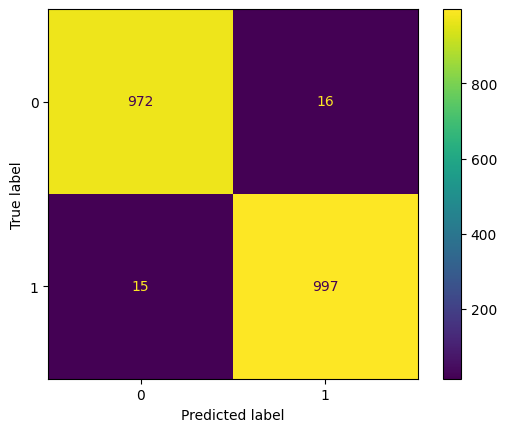

In [67]:
hyper_rf = grid_search.best_estimator_

y_pred_hyper_rf = hyper_rf.predict(X_test)

evaluate(y_pred_hyper_rf)

### Random-Forest with Feature Selection only and with Feature Selection and Hyperparametertuning

In [85]:
def rf_ftr_sel2(n_features):
    used_features = rf_sel.sort_values(ascending=False).head(n_features).index.tolist()

    X = data[used_features]
    y = data["target"] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)

    y_pred_rf = rf_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)

    return accuracy, f1, precision, recall

In [86]:
rf_ftr_results = []

for i in range(10,48,1):
    accuracy, f1, precision, recall = rf_ftr_sel2(i)
    print("number of features: {}, accuracy : {}, f1 score : {}, precision : {}, recall : {}".format(i, accuracy, f1, precision, recall))
    print()

    rf_ftr_results.append([i, accuracy, f1, precision, recall])

number of features: 10, accuracy : 0.9665, f1 score : 0.9668808699950568, precision : 0.9673590504451038, recall : 0.9664031620553359

number of features: 11, accuracy : 0.9725, f1 score : 0.9727857496288966, precision : 0.9742319127849356, recall : 0.9713438735177866

number of features: 12, accuracy : 0.975, f1 score : 0.9753208292201382, precision : 0.9743589743589743, recall : 0.9762845849802372

number of features: 13, accuracy : 0.9735, f1 score : 0.9738271604938271, precision : 0.9733464955577492, recall : 0.974308300395257

number of features: 14, accuracy : 0.978, f1 score : 0.9783677482792527, precision : 0.9735812133072407, recall : 0.983201581027668

number of features: 15, accuracy : 0.977, f1 score : 0.9773175542406312, precision : 0.9753937007874016, recall : 0.9792490118577075

number of features: 16, accuracy : 0.98, f1 score : 0.9802566633761106, precision : 0.9792899408284024, recall : 0.9812252964426877

number of features: 17, accuracy : 0.9785, f1 score : 0.978807

In [87]:
rf_ftr_results_df = pd.DataFrame(rf_ftr_results, columns=["Number of Features", "Accuracy", "F1-Score", "Precision", "Recall"])
rf_ftr_results_df

,Number of Features,Accuracy,F1-Score,Precision,Recall
0,10,0.9665,0.966881,0.967359,0.966403
1,11,0.9725,0.972786,0.974232,0.971344
2,12,0.9750,0.975321,0.974359,0.976285
3,13,0.9735,0.973827,0.973346,0.974308
4,14,0.9780,0.978368,0.973581,0.983202
5,15,0.9770,0.977318,0.975394,0.979249
6,16,0.9800,0.980257,0.979290,0.981225
7,17,0.9785,0.978807,0.976401,0.981225
8,18,0.9795,0.979753,0.979269,0.980237
9,19,0.9810,0.981244,0.980276,0.982213


<Axes: xlabel='Number of Features', ylabel='F1-Score'>

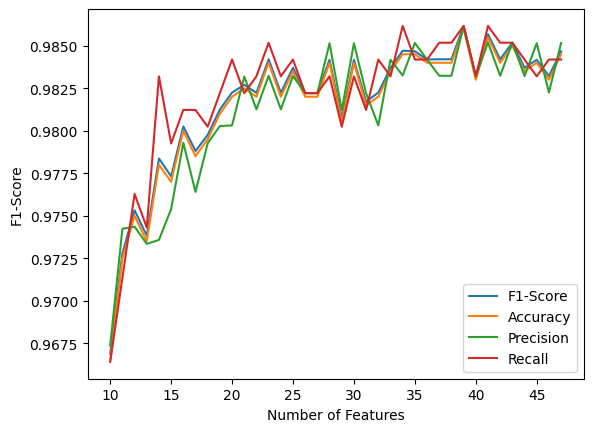

In [88]:
sns.lineplot(x="Number of Features", y="F1-Score", data=rf_ftr_results_df, label="F1-Score")
sns.lineplot(x="Number of Features", y="Accuracy", data=rf_ftr_results_df, label="Accuracy")
sns.lineplot(x="Number of Features", y="Precision", data=rf_ftr_results_df, label="Precision")
sns.lineplot(x="Number of Features", y="Recall", data=rf_ftr_results_df, label="Recall")

Accuracy:     0.9855
F1-Score:     0.9856506679861454
Precision:    0.9871159563924677
Recall:       0.9841897233201581

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       988
           1       0.99      0.98      0.99      1012

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000




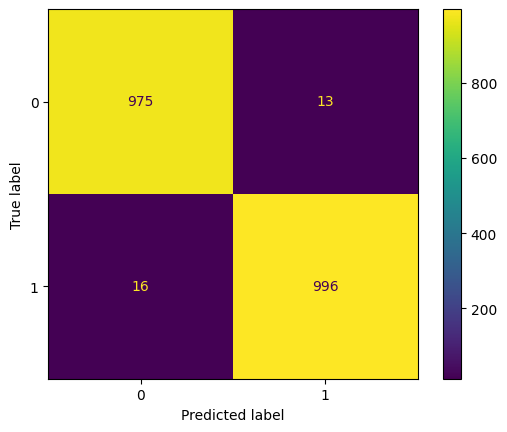

In [103]:
used_features = rf_sel.sort_values(ascending=False).head(40).index.tolist()

X = data[used_features]
y = data["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

evaluate(y_pred_rf)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.7s
[CV] END max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=105; total time=   0.6s
[CV] END max_depth=8

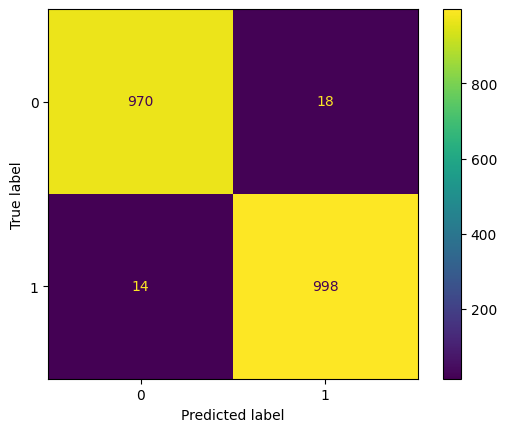

In [104]:
search_space = {
    'n_estimators': [105],
    'max_depth': [None, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 100, 200],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf_hyper_clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_hyper_clf, param_grid=search_space, scoring="f1", cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

hyper_rf = grid_search.best_estimator_

y_pred_hyper_rf = hyper_rf.predict(X_test)

evaluate(y_pred_hyper_rf)

print(grid_search.best_params_)
print(grid_search.best_score_)